<h1><center> ST7-OSTP : TP0 </center></h1>
<h2><center> 01/02/2022 </center></h2>

Ce TP a pour objectif de vous familiariser à la résolution de Programmes Linéaires (PL) avec le solveur Gurobi en utilisant le module $\texttt{gurobipy}$ de Python.

Ce TP est en deux parties :

* La **Partie 1** présente trois méthodes d'instanciation et de résolution appliquées à deux PL.  <br>
* La **Partie 2** vise à vous faire pratiquer ces trois méthodes.

## Modules

In [85]:
# Modules de base
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# Module relatif à Gurobi
from gurobipy import *

# 1. Présentation de trois méthodes pour instancier et résoudre un PL

 ## 1.1. Méthode 1 : par ajout, une par une, des variables et des contraintes

### 1.1.1. Application de la méthode sur le premier programme $(P_1)$

On considère le PL $\boldsymbol{(P_1)}$ suivant : 

$$
\boldsymbol{(P_1)} \qquad
\begin{array}{cc}
    \underset{v_0, ~ v_1}{\text{max}} & v_1 \\
    \text{s.c.} & \left\{
    \begin{array}{rcrlc}
        v_0 & - & v_1 & \leq 4 & \boldsymbol{(C_1)}  \\
        v_0 & + & v_1 & \leq 4 & \boldsymbol{(C_2)} \\
        -0.25 v_0 & + & v_1 & \leq 1 & \boldsymbol{(C_3)}
    \end{array}  \right. \\
    & v_0, ~ v_1 \geq 0
\end{array}
$$

#### Instanciation du PL

In [91]:
# -- Initialisation du modèle --
# m : Model
m = Model("PL1")


# -- Ajout des variables continues  --
# v0 : Var
v0 = m.addVar(vtype = GRB.CONTINUOUS, name = "v0", lb = 0)
# v1 : Var
v1 = m.addVar(vtype = GRB.CONTINUOUS, name = "v1", lb = 0)
# Plus d'informations ici: 
# https://www.gurobi.com/documentation/9.1/refman/py_model_addvar.html#pythonmethod:Model.addVar


# -- Ajout des constraintes --
# c1 : Constr
c1 = m.addConstr(v0 - v1 <= 4, name = "C1")
# c2 : Constr
c2 = m.addConstr(v0 + v1 <= 4, name = "C2")
# c3 : Constr
c3 = m.addConstr(-0.25*v0 + v1 <= 1, name = "C3")
# Plus d'informations ici:
# https://www.gurobi.com/documentation/9.1/refman/py_model_addconstr.html


# -- Ajout de la fonction objectif --
m.setObjective(v1, GRB.MAXIMIZE)
# Plus d'informations ici:
# https://www.gurobi.com/documentation/9.1/refman/py_model_setobjective.html


# -- Choix d'un paramétrage d'affichage minimaliste --
m.params.outputflag = 1 # mode muet
# Plus d'informations ici:
# https://www.gurobi.com/documentation/9.1/refman/outputflag.html


# -- Mise à jour du modèle  --
m.update()
# Plus d'informations ici: 
# https://www.gurobi.com/documentation/9.1/refman/py_model_update.html


# -- Affichage en mode texte du PL --
m.display()

# Fonction .display() dépréciée donc on utilise le code suivant

# # Affichage personnalisé du modèle
# def display_model(model):
#     # Affichage des variables
#     print("Variables:")
#     for v in model.getVars():
#         print(f"{v.VarName}, ", end="")
#     print("\n")

#     # Affichage des contraintes
#     print("Contraintes:")
#     for c in model.getConstrs():
#         print(f"{c.ConstrName}, ", end="")
#     print("\n")

#     # Affichage de la fonction objectif
#     print("Fonction objectif:")
#     print(model.getObjective())

# # Utilisation de la fonction d'affichage personnalisée
# display_model(m)

m.printStats()

Maximize
  v1
Subject To
  C1: v0 + -1.0 v1 <= 4
  C2: v0 + v1 <= 4
  C3: -0.25 v0 + v1 <= 1

Statistics for model PL1:
  Linear constraint matrix    : 3 Constrs, 2 Vars, 6 NZs
  Matrix coefficient range    : [ 0.25, 1 ]
  Objective coefficient range : [ 1, 1 ]
  Variable bound range        : [ 0, 0 ]
  RHS coefficient range       : [ 1, 4 ]


C:\Users\eugid\AppData\Local\Temp\ipykernel_18744\2952144807.py:45: DeprecationWarning: Model.display() is deprecated
  m.display()


#### Résolution du PL

In [23]:
# -- Résolution --
m.optimize()
# Plus d'informations ici: 
# https://www.gurobi.com/documentation/9.1/refman/py_model_optimize.html


# -- Affichage de la solution --
print("La solution optimale est (v0, v1) = {} avec pour valeur de l'objectif z = {}".format((v0.x, v1.x), m.objVal))

La solution optimale est (v0, v1) = (2.4, 1.6) avec pour valeur de l'objectif z = 1.6


#### Représentation graphique du PL (en bonus)

Comme le PL $\boldsymbol{(P_1)}$ possède deux variables, on peut en donner une représentation dans le plan $\mathbb{R}^2$.<br/>
Le code ci-dessous génère un graphique représentant dans $\mathbb{R}^2$ :<br/>
* les droites associées aux contraintes $\boldsymbol{(C_1)}$, $\boldsymbol{(C_2)}$ et $\boldsymbol{(C_3)}$ ;
* l'ensemble des solutions réalisables ;
* la solution optimale ;
* la fonction objectif à l'optimum.

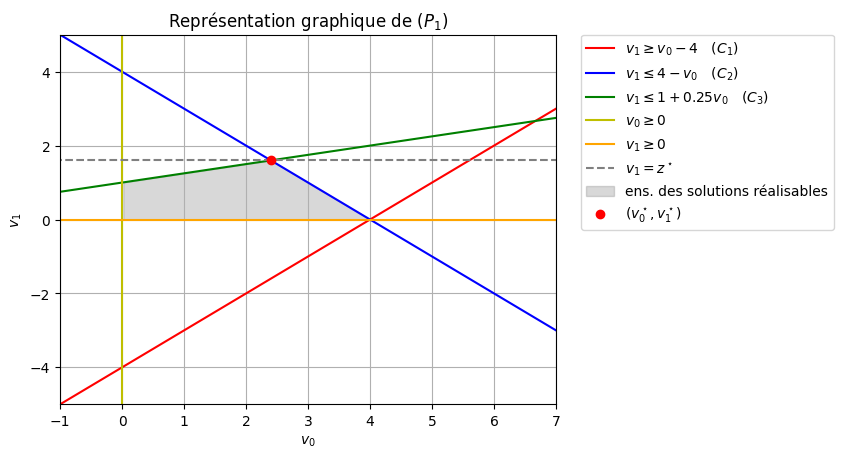

In [27]:
# -- Construction des droites associées aux contraintes --
v0s = np.linspace(-2, 8, 100)
v1s = np.linspace(-6, 6, 100)
# (C1)
v1s_C1 = v0s - 4
# (C2)
v1s_C2 = 4 - v0s
# (C3)
v1s_C3 = 1 + 0.25*v0s
# Borne sur v0
v0s_bound = 0*v1s
# Borne sur v1
v1s_bound = 0*v0s


# -- Dessin des droites associées aux contraintes --
plt.plot(v0s, v1s_C1, 'r', label = '$v_1 \geq v_0 - 4 \quad (C_1)$')
plt.plot(v0s, v1s_C2, 'b', label = '$v_1 \leq 4 - v_0 \quad (C_2)$')
plt.plot(v0s, v1s_C3, 'g', label = '$v_1 \leq 1 + 0.25v_0 \quad (C_3)$')
plt.plot(v0s_bound, v1s, 'y', label = "$v_0 \geq 0$")
plt.plot(v0s, v1s_bound, 'orange', label = "$v_1 \geq 0$")


# -- Construction de la droite associée à l'objectif --
v1s_obj = m.objVal*np.ones(100) # ici m.objVal est égal à z\star = 1.6


# -- Dessin de la droite associés à l'objectif --
plt.plot(v0s, v1s_obj, linestyle = '--', color = 'grey', label = "$v_1 = z^\star$")


# -- Dessin de la région des solutions réalisables --
v1s_sup = np.minimum(v1s_C2, v1s_C3)
v1s_inf = np.maximum(v1s_C1, v1s_bound)
plt.fill_between(v0s, v1s_sup, v1s_inf, where = (v1s_sup > v1s_inf) & (v0s > v0s_bound), 
                 color = 'grey', alpha = 0.3, label = "ens. des solutions réalisables")


# -- Dessin de la solution optimale --
plt.plot(v0.x, v1.x, 'ro', label = "$(v^\star_0, v^\star_1)$")


# -- Définition des paramètres du graphique --
plt.grid()
plt.xlim((-1, 7))
plt.ylim((-5, 5))
plt.xlabel('$v_0$')
plt.ylabel('$v_1$')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
plt.title('Représentation graphique de $(P_1)$')


# -- Affichage du graphique --
plt.show()

### 1.1.2. Application de la méthode sur le deuxième programme $(P_2)$

On considère le PL $\boldsymbol{(P_2)}$ suivant : 

$$
\boldsymbol{(P_2)} \qquad
\begin{array}{cc}
    \underset{x_1, ~ x_2, ~ x_3}{\text{max}} & x_1 + 2 x_2 + 5 x_3 \\
    \text{s.c.} & \left\{
    \begin{array}{rcrcrlc}
        x_1 & - & x_2 & - & 3 x_3 & \geq 5 & \boldsymbol{(C_1)}  \\
        x_1 & + & 3 x_2 & - & 7 x_3 & \leq 10 & \boldsymbol{(C_2)} \\
        x_1 & & & & & \leq 10 & \boldsymbol{(C_3)}
    \end{array} \right. \\
    & x_1, ~ x_2, ~ x_3 \in \mathbb{R}^+
\end{array}
$$

#### Instanciation du PL

In [28]:
# -- Initialisation du modèle --
m = Model("PL2")


# -- Ajout des variables continues  --
x1 = m.addVar(name = "x1", lb = 0, ub = 10)
x2 = m.addVar(name = "x2", lb = 0)
x3 = m.addVar(name = "x3", lb = 0)


# -- Ajout des constraintes --
m.addConstr(-x1 + x2 + 3*x3 <= -5, name = "C1")
m.addConstr(x1 + 3*x2 - 7*x3 <= 10, name = "C2")


# -- Ajout de la fonction objectif
m.setObjective(x1 + 2*x2 + 5*x3, GRB.MAXIMIZE)


# -- Choix d'un paramétrage d'affichage minimaliste --
m.params.outputflag = 0 # mode muet


# -- Mise à jour du modèle --
m.update()


# -- Affichage en mode texte du PL --
# print(m.display())
# Fonction .display() dépréciée donc on utilise le code suivant

# Affichage personnalisé du modèle
def display_model(model):
    # Affichage des variables
    print("Variables:")
    for v in model.getVars():
        print(f"{v.VarName}, ", end="")
    print("\n")

    # Affichage des contraintes
    print("Contraintes:")
    for c in model.getConstrs():
        print(f"{c.ConstrName}, ", end="")
    print("\n")

    # Affichage de la fonction objectif
    print("Fonction objectif:")
    print(model.getObjective())

# Utilisation de la fonction d'affichage personnalisée
display_model(m)

Variables:
x1, x2, x3, 

Contraintes:
C1, C2, 

Fonction objectif:
x1 + 2.0 x2 + 5.0 x3


#### Résolution du PL

In [29]:
# -- Résolution --
m.optimize()


# -- Affichage des solutions --
print("Les solutions optimales sont")
print("x1 =", x1.x)
print("x2 =", x2.x)
print("x3 =", x3.x)
print("avec pour valeur de l'objectif z =", m.objVal)

Les solutions optimales sont
x1 = 10.0
x2 = 2.1875
x3 = 0.9375
avec pour valeur de l'objectif z = 19.0625


#### Représentation graphique du PL (en bonus)

Comme le PL $\boldsymbol{(P_2)}$ possède trois variables, on peut en donner une représentation dans l'espace $\mathbb{R}^3$.<br/>
Le code ci-dessous génère un graphique représentant dans $\mathbb{R}^3$ :<br/>
* les plans associés aux contraintes $\boldsymbol{(C_1)}$, $\boldsymbol{(C_2)}$ et $\boldsymbol{(C_3)}$ ;
* les plans associés aux bornes inférieures des variables $x_1$, $x_2$ et $x_3$ ;
* les intersections des plans des contraintes saturées $\boldsymbol{(C_1)}$, $\boldsymbol{(C_2)}$ et $\boldsymbol{(C_3)}$ ;
* la solution optimale ;
* la fonction objectif à l'optimum.

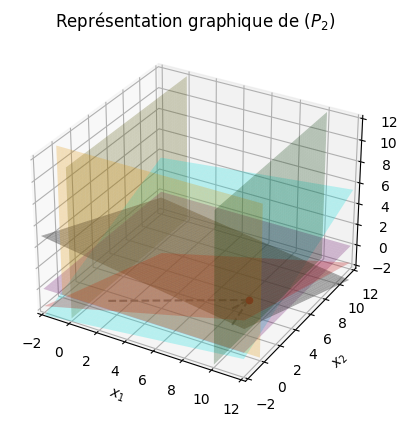

In [30]:
# Décommenter cette ligne afin d'interagir avec le graphique 3d ci-dessous
#%matplotlib notebook

# -- Construction des plans associés aux contraintes --
x1s = np.linspace(-2, 12, 100)
x2s = np.linspace(-2, 12, 100)
x3s = np.linspace(-2, 12, 100)
x12_x1s, x12_x2s = np.meshgrid(x1s, x2s)
x23_x2s, x23_x3s = np.meshgrid(x2s, x3s)
x13_x1s, x13_x3s = np.meshgrid(x1s, x3s)
# (C1)
x3s_C1 = x12_x1s/3 - x12_x2s/3 - 5/3
# (C2)
x3s_C2 = x12_x1s/7 + x12_x2s*3/7 - 10/7
# (C3)
x1s_C3 = 10*np.ones((100, 100))
# Borne sur x1
x1s_bound = 0*np.ones((100, 100))
# Borne sur x2
x2s_bound = 0*np.ones((100, 100))
# Borne sur x3
x3s_bound = 0*np.ones((100, 100))


# -- Creation d'une graphe 3d -- 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# -- Dessin des plans associés aux contraintes --
ax.plot_surface(x12_x1s, x12_x2s, x3s_C1, color='red', alpha=0.25, label = '$(C_1)$')
ax.plot_surface(x12_x1s, x12_x2s, x3s_C2, color='cyan', alpha=0.25, label = '$(C_2)$')
ax.plot_surface(x1s_C3, x23_x2s, x23_x3s, color='green', alpha=0.25, label = '$(C_3)$')
ax.plot_surface(x1s_bound, x23_x2s, x23_x3s, color='y', alpha=0.25, label = "$x_1 \geq 0$")
ax.plot_surface(x13_x1s, x2s_bound, x13_x3s, color='orange', alpha=0.25, label = "$x_2 \geq 0$")
ax.plot_surface(x12_x1s, x12_x2s, x3s_bound, color='purple', alpha=0.25, label = "$x_3 \geq 0$")


# -- Dessin des droites associées aux intersections de contraintes saturées --
ax.plot([x1.x, 4*0 + 5/4], [x2.x, 0], [x3.x, 0 - 5/4], color='grey', linestyle='dashed', label = "$(C_1) \& (C_2)$")
ax.plot([x1.x, 10], [x2.x, 0], [x3.x, -0/3 + 5/3], color='grey', linestyle='dashed', label = "$(C_1) \& (C_3)$")
ax.plot([x1.x, 10], [x2.x, 0], [x3.x, 3/7*0], color='grey', linestyle='dashed', label = "$(C_2) \& (C_3)$")


# -- Dessin des droites associées aux autres intersections -
#ax.plot([4*0 + 5/4, 10], [0, 0], [0 - 5/4, -0/3 + 5/3], color='grey', linestyle='dotted', label = "$(C_1) \& x_2 \geq 0$")


# -- Construction du plan associé à l'objectif --
x3s_obj = -x12_x1s/5 - x12_x2s*2/5 + 19.0625/5


# -- Dessin du plan associé à l'objectif --
ax.plot_surface(x12_x1s, x12_x2s, x3s_obj, color='grey', alpha=.5, label = '$obj$')


# -- Dessin de la solution optimale --
ax.scatter(x1.x, x2.x, x3.x, color='r', label = "$(x^\star_1, x^\star_2, x^\star_3)$")


# -- Définition des paramètres du graphique --
plt.grid()
ax.set_xlim((-2, 12))
ax.set_ylim((-2, 12))
ax.set_zlim((-2, 12))
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')
plt.title('Représentation graphique de $(P_2)$')


# -- Affichage du graphique --
plt.show()

 ## 1.2. Méthode 2 : par écriture matricielle

### 1.2.1. Application de la méthode sur le premier programme $(P_1)$

On considère à nouveau le premier PL $\boldsymbol{(P_1)}$: 

$$
\boldsymbol{(P_1)} \qquad
\begin{array}{cc}
    \underset{v_0, ~ v_1}{\text{max}} & v_1 \\
    \text{s.c.} & \left\{
    \begin{array}{rcrlc}
        v_0 & - & v_1 & \leq 4 & \boldsymbol{(C_1)}  \\
        v_0 & + & v_1 & \leq 4 & \boldsymbol{(C_2)} \\
        -0.25 v_0 & + & v_1 & \leq 1 & \boldsymbol{(C_3)}
    \end{array} \right. \\
    & v_0, ~ v_1 \geq 0
\end{array}
$$

#### Instanciation du PL

In [32]:
# -- Initialisation du modèle --
# m : Model
m = Model("PL1_matrix")


# -- Ajout des variables continues comme vecteur de variables --
# V : MVar
V = m.addMVar(shape = 2, lb = 0, name = "v")
# Plus d'informations ici: 
# https://www.gurobi.com/documentation/9.1/refman/py_model_addmvar.html


# -- Ajout des contraintes comme produit matriciel --
# A : NumPy ndarray
A = np.array([ [1,    -1],
               [1,     1],
               [-0.25, 1] ])
# b : NumPy ndarray
b = np.array([4, 4, 1])
# C : MConstr
C = m.addConstr(A @ V <= b, name = "C")


# -- Ajout de la fonction objectif
# obj : NumPy ndarray
obj = np.array([0.0, 1.0])
m.setObjective(obj @ V, GRB.MAXIMIZE)


# -- Choix d'un paramétrage d'affichage minimaliste --
m.params.outputflag = 0 # mode muet
# Plus d'informations ici:
# https://www.gurobi.com/documentation/9.1/refman/outputflag.html


# -- Mise à jour du modèle  --
m.update()
# Plus d'informations ici: 
# https://www.gurobi.com/documentation/9.1/refman/py_model_update.html


# -- Affichage en mode texte du PL --
# print(m.display())
# Fonction .display() dépréciée donc on utilise le code suivant

# Affichage personnalisé du modèle
def display_model(model):
    # Affichage des variables
    print("Variables:")
    for v in model.getVars():
        print(f"{v.VarName}, ", end="")
    print("\n")

    # Affichage des contraintes
    print("Contraintes:")
    for c in model.getConstrs():
        print(f"{c.ConstrName}, ", end="")
    print("\n")

    # Affichage de la fonction objectif
    print("Fonction objectif:")
    print(model.getObjective())

# Utilisation de la fonction d'affichage personnalisée
display_model(m)

Variables:
v[0], v[1], 

Contraintes:
C[0], C[1], C[2], 

Fonction objectif:
v[1]


#### Résolution du PL

In [33]:
# -- Résolution --
m.optimize()


# -- Affichage de la solution --
print("La solution optimale est [v0, v1] = {} avec pour valeur de l'objectif z = {}".format(V.x, m.objVal))

La solution optimale est [v0, v1] = [2.4 1.6] avec pour valeur de l'objectif z = 1.6


### 1.2.2. Application de la méthode sur le deuxième programme $(P_2)$

On considère à nouveau le deuxième PL $\boldsymbol{(P_2)}$: 

$$
\boldsymbol{(P_2)} \qquad
\begin{array}{cc}
    \underset{x_1, ~ x_2, ~ x_3}{\text{max}} & x_1 + 2 x_2 + 5 x_3 \\
    \text{s.c.} & \left\{
    \begin{array}{rcrcrlc}
        x_1 & - & x_2 & - & 3 x_3 & \geq 5 & \boldsymbol{(C_1)}  \\
        x_1 & + & 3 x_2 & - & 7 x_3 & \leq 10 & \boldsymbol{(C_2)} \\
        x_1 & & & & & \leq 10 & \boldsymbol{(C_3)}
    \end{array} \right. \\
    & x_1, ~ x_2, ~ x_3 \in \mathbb{R}^+
\end{array}
$$

#### Instanciation du PL

In [35]:
# -- Installation du modèle --
# m : Model
m = Model("PL2_2")


# -- Ajout des variables continues comme vecteur de variables --
X = m.addMVar(shape = 3, name = "X")


# -- Ajout des contraintes comme produit matriciel  --
A = np.array([ [-1, 1, 3],
               [ 1, 3,-7],
               [ 1, 0, 0] ])
b = np.array([-5, 10, 10])
m.addConstr(A @ X <= b, name = "C")


# -- Ajout de la fonction objectif --
obj = np.array([1, 2, 5])
m.setObjective(obj @ X, GRB.MAXIMIZE)


# -- Choix d'un paramétrage d'affichage minimaliste --
m.params.outputflag = 0 # mode muet


# -- Mise à jour du modèle --
m.update()


# -- Affichage en mode texte du PL --
# print(m.display())
# Fonction .display() dépréciée donc on utilise le code suivant

# Affichage personnalisé du modèle
def display_model(model):
    # Affichage des variables
    print("Variables:")
    for v in model.getVars():
        print(f"{v.VarName}, ", end="")
    print("\n")

    # Affichage des contraintes
    print("Contraintes:")
    for c in model.getConstrs():
        print(f"{c.ConstrName}, ", end="")
    print("\n")

    # Affichage de la fonction objectif
    print("Fonction objectif:")
    print(model.getObjective())

# Utilisation de la fonction d'affichage personnalisée
display_model(m)

Variables:
X[0], X[1], X[2], 

Contraintes:
C[0], C[1], C[2], 

Fonction objectif:
X[0] + 2.0 X[1] + 5.0 X[2]


#### Résolution du PL

In [36]:
# -- Résolution --
m.optimize()


# -- Affichage de la solution --
print("La solution optimale est (x1, x2, x3) = {} avec pour valeur de l'objectif z = {}".format(list(X.x), m.objVal))

La solution optimale est (x1, x2, x3) = [10.0, 2.1875, 0.9375] avec pour valeur de l'objectif z = 19.0625


## 1.3. Méthode 3 : par lecture d'un fichier .lp

### Application de la méthode sur le deuxième programme $(P_2)$

Consulter le fichier $\texttt{model.lp}$ fourni et analyser les lignes d'instructions de la cellule de code ci-dessous pour comprendre comment s'effectue le chargement du $\boldsymbol{(P_2)}$ depuis un fichier $\texttt{.lp}$.

#### Instanciation du PL

In [19]:
# -- Chargement du PL depuis un fichier .lp --
m = read('model.lp')


# -- Choix d'un paramétrage d'affichage minimaliste  --
m.params.outputflag = 0 # mode muet


# -- Affichage en mode texte du PL --
# print(m.display())
# Fonction .display() dépréciée donc on utilise le code suivant

# Affichage personnalisé du modèle
def display_model(model):
    # Affichage des variables
    print("Variables:")
    for v in model.getVars():
        print(f"{v.VarName}, ", end="")
    print("\n")

    # Affichage des contraintes
    print("Contraintes:")
    for c in model.getConstrs():
        print(f"{c.ConstrName}, ", end="")
    print("\n")

    # Affichage de la fonction objectif
    print("Fonction objectif:")
    print(model.getObjective())

# Utilisation de la fonction d'affichage personnalisée
display_model(m)

Read LP format model from file model.lp
Reading time = 0.00 seconds
: 2 rows, 3 columns, 6 nonzeros
Variables:
x, y, z, 

Contraintes:
c0, c1, 

Fonction objectif:
x + 2.0 y + 5.0 z


#### Résolution du PL

In [38]:
# -- Résolution --
m.optimize()


# -- Extraction de la solution et affichage des valeurs optimales --
x_values = [var.x for var in m.getVars()]
print("La solution optimale est [x1, x2, x3] = {} avec pour objectif z = {}".format(x_values, m.objVal))

La solution optimale est [x1, x2, x3] = [10.0, 2.1875, 0.9375] avec pour objectif z = 19.0625


# 2. Mise en pratique : à vous de jouer maintenant !

Implémenter et résoudre suivant chacune des 3 méthodes détaillées ci-dessus les programmes linéaires ci-dessous.

$$
\boldsymbol{(P_0)} \qquad
\begin{array}{cc}
    \underset{x_1, ~ x_2}{\text{max}} & x_1 + x_2 \\
    \text{s.c.} & \left\{
    \begin{array}{rcrl}
        x_1 & + & x_2 & \geq 14  \\
        - x_1 & & & \leq 8 \\
        & - & x_2 & \leq 10
    \end{array} \right. \\
    & x_1, ~ x_2 \in \mathbb{R}^+
\end{array}
$$

Que remarquez-vous ? 

Consultez [la documentation en ligne](https://www.gurobi.com/documentation/9.1/refman/optimization_status_codes.html#sec:StatusCodes) et l'[exemple suivant](https://www.gurobi.com/documentation/9.1/examples/lp_py.html) pour savoir comment éviter ce problème. 

In [79]:
# -- Installation du modèle --
# m : Model
m = Model("PL2_matrix")


# -- Ajout des variables continues comme vecteur de variables --
X = m.addMVar(shape = 2, name = "X")


# -- Ajout des contraintes comme produit matriciel  --
A = np.array([ [-1, -1],
               [ -1, 0],
               [ 0, -1] ])
b = np.array([-14, 8, 10])
m.addConstr(A @ X <= b, name = "C")


# -- Ajout de la fonction objectif --
obj = np.array([1, 1])
m.setObjective(obj @ X, GRB.MAXIMIZE)


# -- Choix d'un paramétrage d'affichage minimaliste --
m.params.outputflag = 0 # mode muet


# -- Mise à jour du modèle --
m.update()


# -- Affichage en mode texte du PL --
# print(m.display())
# Fonction .display() dépréciée donc on utilise le code suivant

# Affichage personnalisé du modèle
def display_model(model):
    # Affichage des variables
    print("Variables:")
    for v in model.getVars():
        print(f"{v.VarName}, ", end="")
    print("\n")

    # Affichage des contraintes
    print("Contraintes:")
    for c in model.getConstrs():
        print(f"{c.ConstrName}, ", end="")
    print("\n")

    # Affichage de la fonction objectif
    print("Fonction objectif:")
    print(model.getObjective())

# Utilisation de la fonction d'affichage personnalisée
display_model(m)

# -- Résolution --
m.optimize()


# -- Extraction de la solution et affichage des valeurs optimales --
x_values = [var.x for var in m.getVars()]
print("La solution optimale est [x1, x2] = {} avec pour objectif z = {}".format(x_values, m.objVal))

Variables:
X[0], X[1], 

Contraintes:
C[0], C[1], C[2], 

Fonction objectif:
X[0] + X[1]


AttributeError: Unable to retrieve attribute 'x'

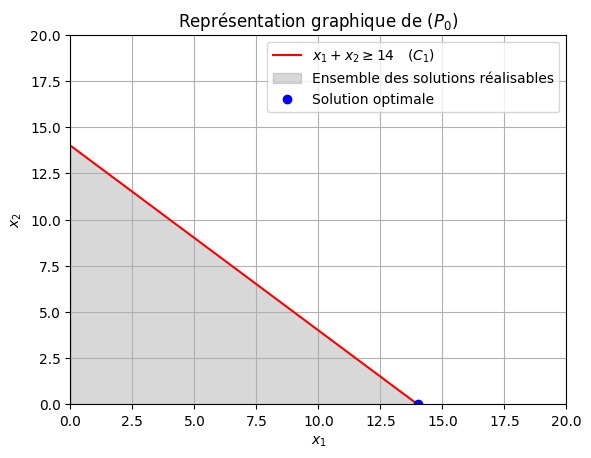

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# -- Construction des droites associées aux contraintes --
x1s = np.linspace(0, 20, 400)  # Ajustement de l'intervalle pour x1 pour qu'il soit positif
x2s_C1 = 14 - x1s  # Correction de la contrainte C1 pour qu'elle soit conforme à x1 + x2 >= 14

# -- Dessin des droites associées aux contraintes --
plt.plot(x1s, x2s_C1, 'r', label = '$x_1 + x_2 \geq 14 \quad (C_1)$')

# Remarque: Les bornes sur x1 et x2 sont des contraintes sur la valeur minimale de ces variables, donc elles n'ont pas besoin d'être dessinées comme des lignes. 
# Les contraintes sont x1 >= -8 (ce qui est toujours vrai puisque x1 est positif) et x2 >= -10 (toujours vrai pour x2 positif).
# Donc, ces contraintes ne limitent pas la région de solutions réalisables dans le quadrant positif.

# -- Dessin de la région des solutions réalisables --
# La région réalisable est limitée par la contrainte C1 dans le quadrant positif.
x2s_realisable = np.maximum(0, 14 - x1s)  # Calcul de x2 pour la région réalisable en se limitant au quadrant positif
plt.fill_between(x1s, 0, x2s_realisable, color = 'grey', alpha = 0.3, label = "Ensemble des solutions réalisables")

if m.status == GRB.OPTIMAL:
    plt.plot(x_values[0], x_values[1], 'bo', label="Solution optimale")


# -- Définition des paramètres du graphique --
plt.grid(True)
plt.xlim(0, 20)
plt.ylim(0, 20)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.title('Représentation graphique de $(P_0)$')

# -- Affichage du graphique --
plt.show()


# # -- Construction des droites associées aux contraintes --
# x1s = np.linspace(-15, 40, 100)
# x2s = np.linspace(-15, 40, 100)
# # (C1)
# x2s_C1 = -x1s + 14
# # Borne sur v0
# x1s_bound = -8*np.ones(100)
# # Borne sur v1
# x2s_bound = -10*np.ones(100)


# # -- Dessin des droites associées aux contraintes --
# plt.plot(x1s, x2s_C1, 'r', label = '$x_2 \geq -x_1 + 14 \quad (C_1)$')
# plt.plot(x1s_bound, x2s, 'y', label = "$x_1 \geq -8$")
# plt.plot(x1s, x2s_bound, 'orange', label = "$x_2 \geq -10$")


# # -- Construction de la droite associée à l'objectif --
# xs_obj = m.objVal*np.ones(100) # ici m.objVal est égal à z\star = 1.6


# # -- Dessin de la droite associés à l'objectif --
# plt.plot(x1s, xs_obj, linestyle = '--', color = 'grey', label = "$x_tot = z^\star$")


# # # -- Dessin de la région des solutions réalisables --
# x2s_sup = np.minimum(x2s_C1, x1s_bound)
# x2s_inf = np.maximum(x2s_C1, x2s_bound)
# plt.fill_between(x2s,x2s_bound, 
#                  color = 'grey', alpha = 0.3, label = "ens. des solutions réalisables")

# # , where = (x2s > x2s_C1) & (x1s > x1s_bound)
# # # -- Dessin de la solution optimale --
# # plt.plot(v0.x, v1.x, 'ro', label = "$(v^\star_0, v^\star_1)$")


# # # -- Définition des paramètres du graphique --
# plt.grid()
# # plt.xlim((-1, 7))
# # plt.ylim((-5, 5))
# plt.xlabel('$x_1$')
# plt.ylabel('$x_2$')
# plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
# plt.title('Représentation graphique de $(P_1)$')


# # -- Affichage du graphique --
# plt.show()

$$
\boldsymbol{(P_1)} \qquad
\begin{array}{cc}
    \underset{x_1, ~ x_2}{\text{max}} & x_1 + x_2 \\
    \text{s.c.} & \left\{
    \begin{array}{rcrl}
        2 x_1 & + & x_2 & \leq 14  \\
        - x_1 & + & 2 x_2 & \leq 8 \\
        2 x_1 & - & x_2 & \leq 10
    \end{array} \right. \\
    & x_1, ~ x_2 \in \mathbb{R}^+
\end{array}
$$

In [76]:
# -- Installation du modèle --
# m : Model
m = Model("PL3")


# -- Ajout des variables continues comme vecteur de variables --
X = m.addMVar(shape = 2, name = "X")


# -- Ajout des contraintes comme produit matriciel  --
A = np.array([ [2, 1],
               [ -1, 2],
               [ 2, -1] ])
b = np.array([14, 8, 10])
m.addConstr(A @ X <= b, name = "C")


# -- Ajout de la fonction objectif --
obj = np.array([1, 1])
m.setObjective(obj @ X, GRB.MAXIMIZE)


# -- Choix d'un paramétrage d'affichage minimaliste --
m.params.outputflag = 0 # mode muet


# -- Mise à jour du modèle --
m.update()


# -- Affichage en mode texte du PL --
# print(m.display())
# Fonction .display() dépréciée donc on utilise le code suivant

# Affichage personnalisé du modèle
def display_model(model):
    # Affichage des variables
    print("Variables:")
    for v in model.getVars():
        print(f"{v.VarName}, ", end="")
    print("\n")

    # Affichage des contraintes
    print("Contraintes:")
    for c in model.getConstrs():
        print(f"{c.ConstrName}, ", end="")
    print("\n")

    # Affichage de la fonction objectif
    print("Fonction objectif:")
    print(model.getObjective())

# Utilisation de la fonction d'affichage personnalisée
display_model(m)

# -- Résolution --
m.optimize()


# -- Extraction de la solution et affichage des valeurs optimales --
x_values = [var.x for var in m.getVars()]
print("La solution optimale est [x1, x2] = {} avec pour objectif z = {}".format(x_values, m.objVal))

Variables:
X[0], X[1], 

Contraintes:
C[0], C[1], C[2], 

Fonction objectif:
X[0] + X[1]
La solution optimale est [x1, x2] = [4.0, 6.0] avec pour objectif z = 10.0


$$
\boldsymbol{(P_2)} \qquad
\begin{array}{cc}
    \underset{x_1, ~ x_2, ~ x_3}{\text{min}} & 14 x_1 + 8 x_2 + 10 x_3 \\
    \text{s.c.} &  \left\{
    \begin{array}{rcrcrl}
        2 x_1 & - & x_2 & + & 2 x_3 & \geq 1  \\
        x_1 & + & 2 x_2 & - & x_3 & \geq 1
    \end{array} \right. \\
    & x_1, ~ x_2, ~ x_3 \in \mathbb{R}^+
\end{array}
$$

In [81]:
# -- Installation du modèle --
# m : Model
m = Model("PL4")


# -- Ajout des variables continues comme vecteur de variables --
X = m.addMVar(shape = 3, name = "X")


# -- Ajout des contraintes comme produit matriciel  --
A = np.array([ [-2, 1, -2],
               [ -1, -2, 1],
               ])
b = np.array([-1, -1])
m.addConstr(A @ X <= b, name = "C")


# -- Ajout de la fonction objectif --
obj = np.array([14, 8, 10])
m.setObjective(obj @ X, GRB.MAXIMIZE)


# -- Choix d'un paramétrage d'affichage minimaliste --
m.params.outputflag = 0 # mode muet


# -- Mise à jour du modèle --
m.update()


# -- Affichage en mode texte du PL --
# print(m.display())
# Fonction .display() dépréciée donc on utilise le code suivant

# Affichage personnalisé du modèle
def display_model(model):
    # Affichage des variables
    print("Variables:")
    for v in model.getVars():
        print(f"{v.VarName}, ", end="")
    print("\n")

    # Affichage des contraintes
    print("Contraintes:")
    for c in model.getConstrs():
        print(f"{c.ConstrName}, ", end="")
    print("\n")

    # Affichage de la fonction objectif
    print("Fonction objectif:")
    print(model.getObjective())

# Utilisation de la fonction d'affichage personnalisée
display_model(m)

# -- Résolution --
m.optimize()


# -- Extraction de la solution et affichage des valeurs optimales --
x_values = [var.x for var in m.getVars()]
print("La solution optimale est [x1, x2] = {} avec pour objectif z = {}".format(x_values, m.objVal))

Variables:
X[0], X[1], X[2], 

Contraintes:
C[0], C[1], 

Fonction objectif:
14.0 X[0] + 8.0 X[1] + 10.0 X[2]


AttributeError: Unable to retrieve attribute 'x'

$$
\boldsymbol{(P_3)} \qquad
\begin{array}{cc}
    \underset{A, ~ B, ~ C}{\text{max}} & 160 A + 300 B + 500 C \\
    \text{s.c.} & \left\{
    \begin{array}{rcrcrl}
        3 A & + & 3.5 B & + & 5 C & \leq 1800 \\
        4 A & + & 5 B & + & 8 C & \leq 2400 \\
        A & + & 1.5 B & + & 3 C & \leq 720 \\
        A & & & & & \geq 100 \\
        & & B & & & \geq 150 \\
        & & & & C & \geq 75
    \end{array} \right. \\
    & A, ~ B, ~ C \in \mathbb{N}
\end{array}
$$

In [84]:
# -- Installation du modèle --
# m : Model
m = Model("PL2_matrix")


# -- Ajout des variables continues comme vecteur de variables --
X = m.addMVar(shape = 3, name = "X")


# -- Ajout des contraintes comme produit matriciel  --
A = np.array([ [3, 3.5, 5],
               [4, 5, 8],
               [1, 1.5, 3],
                [-1, 0, 0],
                [0, -1, 0],
                [0, 0, -1] ])
b = np.array([1800, 2400, 720, -100, -150, -75])
m.addConstr(A @ X <= b, name = "C")


# -- Ajout de la fonction objectif --
obj = np.array([160, 300, 500])
m.setObjective(obj @ X, GRB.MAXIMIZE)


# -- Choix d'un paramétrage d'affichage minimaliste --
m.params.outputflag = 0 # mode muet


# -- Mise à jour du modèle --
m.update()


# -- Affichage en mode texte du PL --
# print(m.display())
# Fonction .display() dépréciée donc on utilise le code suivant

# Affichage personnalisé du modèle
def display_model(model):
    # Affichage des variables
    print("Variables:")
    for v in model.getVars():
        print(f"{v.VarName}, ", end="")
    print("\n")

    # Affichage des contraintes
    print("Contraintes:")
    for c in model.getConstrs():
        print(f"{c.ConstrName}, ", end="")
    print("\n")

    # Affichage de la fonction objectif
    print("Fonction objectif:")
    print(model.getObjective())

# Utilisation de la fonction d'affichage personnalisée
display_model(m)

# -- Résolution --
m.optimize()


# -- Extraction de la solution et affichage des valeurs optimales --
x_values = [var.x for var in m.getVars()]
print("La solution optimale est [x1, x2, x3] = {} avec pour objectif z = {}".format(x_values, m.objVal))

Variables:
X[0], X[1], X[2], 

Contraintes:
C[0], C[1], C[2], C[3], C[4], C[5], 

Fonction objectif:
160.0 X[0] + 300.0 X[1] + 500.0 X[2]
La solution optimale est [x1, x2, x3] = [100.0, 263.3333333333333, 75.0] avec pour objectif z = 132500.0


$$
\boldsymbol{(P_4)} \qquad
\begin{array}{cc}
    \underset{x}{\text{max}} & c^T x \\
    \text{s.c.} & A x \leq b \\
    & x \in \left(\mathbb{R}^+\right)^2
\end{array}
$$

avec
$$
A = \begin{pmatrix} 1 & 1 \\ 1 & 3 \\ 0 & 3 \end{pmatrix}, \qquad
b = \begin{pmatrix} 150 \\ 210 \\ 180 \end{pmatrix}, \qquad
c = \begin{pmatrix} 300 \\ 500 \end{pmatrix}
$$

In [ ]:
# A compléter